# <font color="red"> GTSRB - German Traffic Sign Recognition Benchmark

Context
* The German Traffic Sign Benchmark is a multi-class, single-image classification challenge held at the International Joint Conference on Neural Networks (IJCNN) 2011. We cordially invite researchers from relevant fields to participate: The competition is designed to allow for participation without special domain knowledge. Our benchmark has the following properties:

Single-image, multi-class classification problem
* More than 40 classes
* More than 50,000 images in total
* Large, lifelike database

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import pandas as pd
import random as r
import glob
import skimage.io as io
import matplotlib.pyplot as plt
import keras
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import  Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
!unzip /content/drive/MyDrive/gtsrb.zip

In [4]:
yol = "/content/Train"

In [70]:
train_files = glob.glob(yol+"/*/"+"*.png")

In [ ]:
train_files

In [71]:
len(train_files)

39209

In [8]:
train_files[:10]

['/content/Train/27/00027_00000_00020.png',
 '/content/Train/27/00027_00000_00006.png',
 '/content/Train/27/00027_00002_00024.png',
 '/content/Train/27/00027_00003_00026.png',
 '/content/Train/27/00027_00004_00019.png',
 '/content/Train/27/00027_00004_00015.png',
 '/content/Train/27/00027_00002_00012.png',
 '/content/Train/27/00027_00001_00006.png',
 '/content/Train/27/00027_00000_00025.png',
 '/content/Train/27/00027_00003_00019.png']

In [10]:
data = []
labels = []

for file in train_files:

  #dosya yolu ile klasör adını ayır
  folder_name = file.split("/")[-2]

  #klasör adının son iki karakteri etiket olacak
  label=int(folder_name[-2:])


  #resmi oku, boyutunu ayarla ve veri listesine ekle
  img=cv2.imread(file)
  img=cv2.resize(img,(30,30))
  data.append(img)

  #etiketi listeye ekle
  labels.append(label)

data = np.array(data)
labels = np.array(labels)

In [12]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

In [13]:
x_train.shape,y_train.shape

((31367, 30, 30, 3), (31367,))

In [14]:
x_test.shape,y_test.shape

((7842, 30, 30, 3), (7842,))

In [35]:
model=Sequential()

model.add(Conv2D(filters=16,kernel_size=(5,5),activation="relu",input_shape=(30,30,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),activation="relu"))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(43,activation="softmax"))

In [42]:
x_train.shape[1:]

(30, 30, 3)

In [56]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu",input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32,kernel_size=(5,5),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64,kernel_size=(4,4),activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(4,4),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(43,activation="softmax"))

In [57]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [58]:
history=model.fit(x_train,y_train,epochs=17,validation_data=(x_test,y_test))
                            

Epoch 1/17
981/981 [==============================] - 9s 7ms/step - loss: 1.8926 - accuracy: 0.5273 - val_loss: 0.4565 - val_accuracy: 0.8812
Epoch 2/17
981/981 [==============================] - 5s 5ms/step - loss: 0.4536 - accuracy: 0.8746 - val_loss: 0.2219 - val_accuracy: 0.9415
Epoch 3/17
981/981 [==============================] - 6s 6ms/step - loss: 0.3097 - accuracy: 0.9158 - val_loss: 0.1686 - val_accuracy: 0.9583
Epoch 4/17
981/981 [==============================] - 6s 6ms/step - loss: 0.2463 - accuracy: 0.9326 - val_loss: 0.1108 - val_accuracy: 0.9739
Epoch 5/17
981/981 [==============================] - 5s 5ms/step - loss: 0.2188 - accuracy: 0.9432 - val_loss: 0.0666 - val_accuracy: 0.9844
Epoch 6/17
981/981 [==============================] - 6s 6ms/step - loss: 0.2073 - accuracy: 0.9451 - val_loss: 0.1205 - val_accuracy: 0.9654
Epoch 7/17
981/981 [==============================] - 5s 5ms/step - loss: 0.2013 - accuracy: 0.9505 - val_loss: 0.1077 - val_accuracy: 0.9714
Epoch 

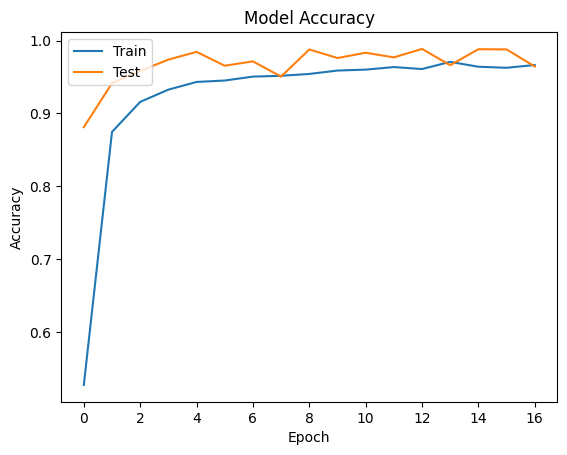

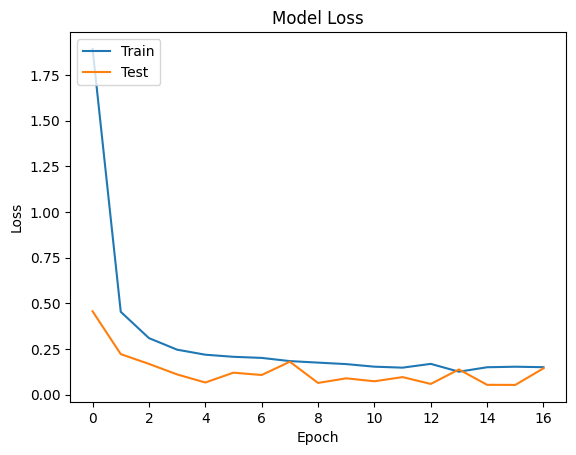

In [59]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train","Test"],loc="upper left")
plt.show()

In [60]:
model.save("sign_recog.h5")

## <font color="purple"> Loading Test Dataset and Prediction

In [61]:
y_test=pd.read_csv("/content/Test.csv")

In [62]:
y_test

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png
...,...,...,...,...,...,...,...,...
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png


In [63]:
labels=y_test["ClassId"].values

In [64]:
labels

array([16,  1, 38, ...,  6,  7, 10])

In [65]:
imgs=y_test["Path"].values

In [66]:
imgs

array(['Test/00000.png', 'Test/00001.png', 'Test/00002.png', ...,
       'Test/12627.png', 'Test/12628.png', 'Test/12629.png'], dtype=object)

In [75]:
test_yol = "/content/Test/"

test_files = glob.glob(test_yol+"*.png")

In [ ]:
test_files

In [77]:
len(test_files)

12630

In [87]:
test_images = []


for file in imgs:

  #resmi oku, boyutunu ayarla ve veri listesine ekle
  img=cv2.imread(file)
  img=cv2.resize(img,(30,30))
  
  test_images.append(img)

test_images = np.array(test_images)

In [88]:
predictions = model.predict(test_images)

395/395 [==============================] - 1s 2ms/step


In [89]:
predicted_classes = np.argmax(predictions,axis=1)

In [90]:
len(predicted_classes)

12630

In [91]:
predicted_classes

array([16,  1, 38, ...,  2,  7, 10])

In [92]:
from sklearn.metrics import accuracy_score

print(accuracy_score(labels,predicted_classes))

0.9187648456057007
